In [1]:
import tensorflow as tf
print(tf.__version__)

C:\Users\Akshay\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Akshay\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Akshay\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Akshay\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

1.14.0


In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Conv2D,GlobalMaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.models import Model

In [3]:
# Loading the dataset:
cifar10 = tf.keras.datasets.cifar10

In [4]:
(x_train,y_train), (x_test,y_test) = cifar10.load_data()
x_train,x_test = x_train/255.0, x_test/255.0 #Standardising

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
x_train[0].shape

(32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

In [9]:
x_test.shape

(10000, 32, 32, 3)

In [10]:
y_test.shape

(10000, 1)

Since the targets are 2D array N x 1 instead of N. Therefore, we need to flatten it.

In [11]:
y_train,y_test = y_train.flatten(), y_test.flatten()

In [12]:
y_train.shape

(50000,)

In [13]:
y_test.shape

(10000,)

In [14]:
# Number of classes, Output:
K = len(set(y_train))
print('Number Of Classes:',K)

Number Of Classes: 10


In [19]:
# Building our model using Functional API:
i = Input(x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
# Building our NN:
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(K, activation='softmax')(x) #Output Layer


# Once we have the variable representing the input "i"
# and the variable representing the output "x",
# we can pass these into the Model() constructor

model = Model(i,x)

In [20]:
# Compile & Fit:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

r = model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs = 15)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 115s 2ms/sample - loss: 1.6054 - acc: 0.4106 - val_loss: 1.3466 - val_acc: 0.5096
Epoch 2/15
50000/50000 [==============================] - 89s 2ms/sample - loss: 1.3310 - acc: 0.5192 - val_loss: 1.1990 - val_acc: 0.5645
Epoch 3/15
50000/50000 [==============================] - 82s 2ms/sample - loss: 1.2059 - acc: 0.5689 - val_loss: 1.0666 - val_acc: 0.6187
Epoch 4/15
50000/50000 [==============================] - 87s 2ms/sample - loss: 1.1199 - acc: 0.5980 - val_loss: 1.0145 - val_acc: 0.6386
Epoch 5/15
50000/50000 [==============================] - 89s 2ms/sample - loss: 1.0611 - acc: 0.6189 - val_loss: 1.0415 - val_acc: 0.6391
Epoch 6/15
50000/50000 [==============================] - 87s 2ms/sample - loss: 1.0093 - acc: 0.6389 - val_loss: 0.9413 - val_acc: 0.6703
Epoch 7/15
50000/50000 [==============================] - 84s 2ms/sample - loss: 0.9642 - acc: 0.6587 - val_loss: 0

**Observation: We get an accuracy of around 71.87%. SO its clearer now that CIFAR10 is an even more difficult dataset than MNIST and Fashion MNIST.**

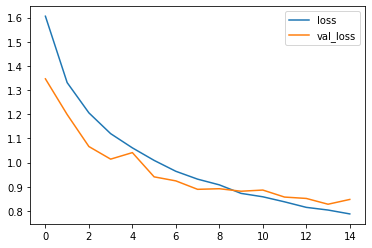

In [21]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

Observation:

Again, we see that the model if Overfitting and it will increase to overfit more if we run it for more number of epochs.

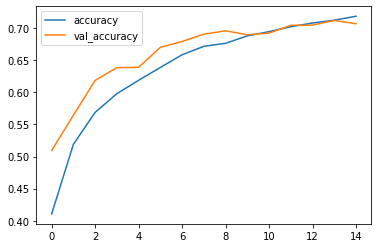

In [23]:
# Plot accuracy per iteration
plt.plot(r.history['acc'], label='accuracy')
plt.plot(r.history['val_acc'], label='val_accuracy')
plt.legend()

Observation:

We can see that the training accuracy has not yet converged while the validation accuracy has become steady. This is another sign that our model is overfitting and learning only the noise in the data.

Confusion matrix, without normalization
[[696  29  33  20  16   4  13   8 154  27]
 [ 17 865   3   6   6   3  10   2  29  59]
 [ 67   6 528  96 110  62  65  34  27   5]
 [ 21   8  53 552  83 160  56  35  16  16]
 [ 19   5  55  81 659  29  52  78  21   1]
 [  8   3  38 219  52 581  28  51  15   5]
 [  5   3  29  67  51  22 809   5   9   0]
 [ 16   3  19  48  68  58  11 759   5  13]
 [ 29  39  10  12   6   2   6   6 870  20]
 [ 26 109   5  23   9   8  13  19  36 752]]


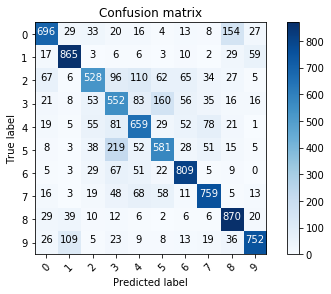

In [24]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [25]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

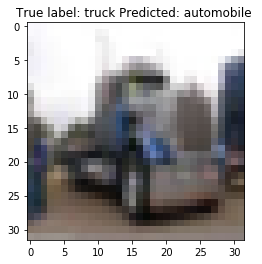

In [26]:
# Show the misclassified examples
misclassified_img = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(x_test[i], cmap = 'gray')
plt.title("True label: %s Predicted: %s " %(labels[y_test[i]], labels[p_test[i]]));

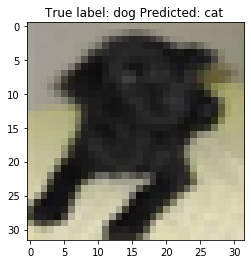

In [27]:
# Show the misclassified examples
misclassified_img = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(x_test[i])
plt.title("True label: %s Predicted: %s " %(labels[y_test[i]], labels[p_test[i]]));

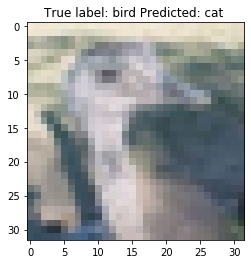

In [29]:
# Show the misclassified examples
misclassified_img = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_img)
plt.imshow(x_test[i])
plt.title("True label: %s Predicted: %s " %(labels[y_test[i]], labels[p_test[i]]));